<img src="https://utn.educativa.org/archivos/logos/Logo_aula_virtual_2Mesa_de_trabajo_4-8.png" width=200 height=150 />

<center><h1 style="color:red">BIOINFORMÁTICA</h1></center>


<center><h2 style="color:orange">BIOPYTHON</h1></center>

**Moises Gualapuro**
 

Biopython es un gran módulo (proyecto) que proporciona muchas herramientas bioinformáticas estandarizadas que, por ejemplo, facilitan el análisis y visualización de datos de secuencia, la interfaz con repositorios de datos, el análisis de formatos de archivo populares y la integración de programas como BLAST o Primer3.

Básicamente, el objetivo de Biopython es facilitar al máximo el uso de Python para bioinformática mediante la creación de clases y módulos reutilizables de alta calidad. Las características de Biopython incluyen analizadores para varios formatos de archivo de bioinformática (BLAST, Clustalw, FASTA, Genbank, ...), acceso a servicios en línea (NCBI, Expasy, ...), interfaces a programas comunes y no tan comunes (Clustalw, DSSP, MSMS ...), una clase de secuencia estándar, varios módulos de agrupamiento, una estructura de datos de árbol KD, etc. e incluso documentación.

Biopython no forma parte de la biblioteca estándar de Python y debe instalarse. 

```python 

!pip install biopython
```
Para leer mayores detalles revisen [Tutorial de Biopython](http://biopython.org/DIST/docs/tutorial/Tutorial.html)


In [2]:
!pip install biopython
#!pip install reportlab
#!pip install nglview

### Ejemplo: secuencias

In [6]:
# cargar biopython o sus módulo, funciones
# Lectura y visualización
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

# Filogenia
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import AlignIO

# Proteínas
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets

import warnings
warnings.filterwarnings('ignore')

In [4]:
import Bio
print(Bio.__version__)
dir(Bio)

1.79


['BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'StreamModeError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

In [ ]:
seq0 = "ATAGATCTATATCCAAAATATGATTCC"
type(seq0)

str

In [7]:
?Seq

In [8]:
# se define una secuencia
my_seq = Seq("ATAGATCTATATCCAAAATATGATTCC")
print(type(my_seq))

<class 'Bio.Seq.Seq'>


In [9]:
GC(my_seq)

25.925925925925927

In [ ]:
GC(seq0)

25.925925925925927

In [ ]:
my_seq.

![rcomplement](img/rcomplement.jpg)

In [ ]:
print(my_seq)
my_seq.reverse_complement()

ATAGATCTATATCCAAAATATGATTCC


Seq('GGAATCATATTTTGGATATAGATCTAT')

In [ ]:
seq0.

SyntaxError: invalid syntax (Temp/ipykernel_19388/3350125061.py, line 1)

In [ ]:
my_seq_c = my_seq.complement()
print(my_seq)
my_seq_c

ATAGATCTATATCCAAAATATGATTCC


Seq('TATCTAGATATAGGTTTTATACTAAGG')

In [ ]:
?Seq.complement

In [ ]:
my_seq_rc = my_seq.reverse_complement()
my_seq_rc


Seq('GGAATCATATTTTGGATATAGATCTAT')

In [ ]:
len(my_seq)

27

In [ ]:
my_seq

Seq('ATAGATCTATATCCAAAATATGATTCC')

In [ ]:
small_seq = my_seq[1:14]
small_seq

Seq('TAGATCTATATCC')

In [ ]:
# contenido de GC
GC(my_seq)

25.925925925925927

In [10]:
coding = Seq('ATGTAGATATCGCTGCTAGCGATCGTAGCTA')
coding.transcribe()

Seq('AUGUAGAUAUCGCUGCUAGCGAUCGUAGCUA')

In [ ]:
coding.translate()

Seq('M*ISLLAIVA')

In [11]:
template = coding.reverse_complement().transcribe().translate()
template


Seq('*LRSLAAIST')

## Traducción

In [ ]:
gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCAGCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGATAATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACATTATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCATAAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")

In [ ]:
gene.translate()

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HR*')

In [ ]:
gene.translate(table="Bacterial")

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HR*')

In [ ]:
gene_prot1 = gene.translate(table="Bacterial")
gene_prot2 = gene.translate(table="Bacterial", to_stop=True)
gene_prot3 = gene.translate(table="Bacterial", cds=True) 

print("DNA:", len(gene), "; \t", gene)
print("AA:", len(gene_prot1), "; \t", gene_prot1)
print("AA:", len(gene_prot2), "; \t", gene_prot2)
print("AA:", len(gene_prot3), "; \t", gene_prot3)

DNA: 297 ; 	 GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCAGCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGATAATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACATTATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCATAAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA
AA: 99 ; 	 VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR*
AA: 98 ; 	 VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR
AA: 98 ; 	 MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Bacterial"]
print(standard_table)
print("Codones de inicio:",standard_table.start_codons)
print("Codones de pare:",standard_table.stop_codons)
print("Nucléotidos:",standard_table.nucleotide_alphabet)
print("Aminoácidos:",standard_table.protein_alphabet)

Table 11 Bacterial, Archaeal, Plant Plastid

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA I(s)| ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG

In [ ]:
CodonTable.standard_dna_table.forward_table

{'TTT': 'F',
 'TTC': 'F',
 'TTA': 'L',
 'TTG': 'L',
 'TCT': 'S',
 'TCC': 'S',
 'TCA': 'S',
 'TCG': 'S',
 'TAT': 'Y',
 'TAC': 'Y',
 'TGT': 'C',
 'TGC': 'C',
 'TGG': 'W',
 'CTT': 'L',
 'CTC': 'L',
 'CTA': 'L',
 'CTG': 'L',
 'CCT': 'P',
 'CCC': 'P',
 'CCA': 'P',
 'CCG': 'P',
 'CAT': 'H',
 'CAC': 'H',
 'CAA': 'Q',
 'CAG': 'Q',
 'CGT': 'R',
 'CGC': 'R',
 'CGA': 'R',
 'CGG': 'R',
 'ATT': 'I',
 'ATC': 'I',
 'ATA': 'I',
 'ATG': 'M',
 'ACT': 'T',
 'ACC': 'T',
 'ACA': 'T',
 'ACG': 'T',
 'AAT': 'N',
 'AAC': 'N',
 'AAA': 'K',
 'AAG': 'K',
 'AGT': 'S',
 'AGC': 'S',
 'AGA': 'R',
 'AGG': 'R',
 'GTT': 'V',
 'GTC': 'V',
 'GTA': 'V',
 'GTG': 'V',
 'GCT': 'A',
 'GCC': 'A',
 'GCA': 'A',
 'GCG': 'A',
 'GAT': 'D',
 'GAC': 'D',
 'GAA': 'E',
 'GAG': 'E',
 'GGT': 'G',
 'GGC': 'G',
 'GGA': 'G',
 'GGG': 'G'}

In [ ]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)
print("Codones de inicio:",mito_table.start_codons)
print("Codones de pare:",mito_table.stop_codons)
print("Nucléotidos:",mito_table.nucleotide_alphabet)
print("Aminoácidos:",mito_table.protein_alphabet)
standard_table.protein_alphabet == mito_table.protein_alphabet

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

True

## Manipular secuencias

In [ ]:
from Bio.Seq import MutableSeq
mutable_seq = MutableSeq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")

print("Secuencia:", mutable_seq)
mutable_seq[5] = "C"
print("Secuencia con C:", mutable_seq)
mutable_seq.remove("T")
print("Secuencia sin T:", mutable_seq)
mutable_seq.reverse()
print("Secuencia reversa:", mutable_seq)

print(type(mutable_seq)) # editable
mutable_seq[0] = "M"
print("Secuencia nueva:", mutable_seq)

secuencia = Seq(mutable_seq)
print(type(secuencia)) # no editable
secuencia[0] = "A"

Secuencia: GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA
Secuencia con C: GCCATCGTAATGGGCCGCTGAAAGGGTGCCCGA
Secuencia sin T: GCCACGTAATGGGCCGCTGAAAGGGTGCCCGA
Secuencia reversa: AGCCCGTGGGAAAGTCGCCGGGTAATGCACCG
<class 'Bio.Seq.MutableSeq'>
Secuencia nueva: MGCCCGTGGGAAAGTCGCCGGGTAATGCACCG
<class 'Bio.Seq.Seq'>


TypeError: 'Seq' object does not support item assignment

## Leyendo archivos  (fasta, gb)


In [13]:
# Secuencia simple fasta 
record = SeqIO.read("data/Ecoli.fasta", "fasta")
print(record)
print("\n\nIdentificación de la secuencia:",record.id)


ValueError: More than one record found in handle

In [ ]:
record.seq.translate()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [ ]:
# Secuencia simple genbank
record_gb = SeqIO.read("data/orov_seq.gb", "genbank")
print(record_gb)

ID: KP691605.1
Name: KP691605
Description: Oropouche virus isolate BeH759024 segment S, complete sequence
Number of features: 5
/molecule_type=cRNA
/topology=linear
/data_file_division=VRL
/date=15-MAR-2015
/accessions=['KP691605']
/sequence_version=1
/keywords=['']
/source=Oropouche virus
/organism=Oropouche virus
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Ellioviricetes', 'Bunyavirales', 'Peribunyaviridae', 'Orthobunyavirus']
/references=[Reference(title='A genetic analysis of the Oropouche virus species and identification of a novel M segment sequence', ...), Reference(title='Direct Submission', ...)]
/comment=GenBank Accession Numbers KP691603-KP691605 represent sequences
from the 3 segments of Oropouche virus BeH759024.
/structured_comment=OrderedDict([('Assembly-Data', OrderedDict([('Assembly Method', 'Newbler v. v.2.6; Celera v. v.8.1; CLC Genomics Workbench v. 6'), ('Sequencing Technology', '454; Sanger dideoxy sequencing')]))])

In [ ]:
record_gb.annotations

{'molecule_type': 'cRNA',
 'topology': 'linear',
 'data_file_division': 'VRL',
 'date': '15-MAR-2015',
 'accessions': ['KP691605'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'Oropouche virus',
 'organism': 'Oropouche virus',
 'taxonomy': ['Viruses',
  'Riboviria',
  'Orthornavirae',
  'Negarnaviricota',
  'Polyploviricotina',
  'Ellioviricetes',
  'Bunyavirales',
  'Peribunyaviridae',
  'Orthobunyavirus'],
 'references': [Reference(title='A genetic analysis of the Oropouche virus species and identification of a novel M segment sequence', ...),
  Reference(title='Direct Submission', ...)],
 'comment': 'GenBank Accession Numbers KP691603-KP691605 represent sequences\nfrom the 3 segments of Oropouche virus BeH759024.',
 'structured_comment': OrderedDict([('Assembly-Data',
               OrderedDict([('Assembly Method',
                             'Newbler v. v.2.6; Celera v. v.8.1; CLC Genomics Workbench v. 6'),
                            ('Sequencing Technology',
          

In [ ]:
record_gb.annotations['taxonomy']

['Viruses',
 'Riboviria',
 'Orthornavirae',
 'Negarnaviricota',
 'Polyploviricotina',
 'Ellioviricetes',
 'Bunyavirales',
 'Peribunyaviridae',
 'Orthobunyavirus']

In [ ]:
print("\n\nIdentificación de la secuencia:",record_gb.id)
print(record_gb.translate())

print(record_gb.annotations["source"])
print(record_gb.annotations["taxonomy"])
len(record_gb.features)



Identificación de la secuencia: KP691605.1
ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
/molecule_type=protein
Seq('SSVLHNSKHKKKFQ*CQSSFSMMYHNGLHLHLIRRQHMWHLKLDTDKCSMLVLL...AHY')
Oropouche virus
['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Polyploviricotina', 'Ellioviricetes', 'Bunyavirales', 'Peribunyaviridae', 'Orthobunyavirus']


5

In [ ]:
record_gb.annotations

{'molecule_type': 'cRNA',
 'topology': 'linear',
 'data_file_division': 'VRL',
 'date': '15-MAR-2015',
 'accessions': ['KP691605'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'Oropouche virus',
 'organism': 'Oropouche virus',
 'taxonomy': ['Viruses',
  'Riboviria',
  'Orthornavirae',
  'Negarnaviricota',
  'Polyploviricotina',
  'Ellioviricetes',
  'Bunyavirales',
  'Peribunyaviridae',
  'Orthobunyavirus'],
 'references': [Reference(title='A genetic analysis of the Oropouche virus species and identification of a novel M segment sequence', ...),
  Reference(title='Direct Submission', ...)],
 'comment': 'GenBank Accession Numbers KP691603-KP691605 represent sequences\nfrom the 3 segments of Oropouche virus BeH759024.',
 'structured_comment': OrderedDict([('Assembly-Data',
               OrderedDict([('Assembly Method',
                             'Newbler v. v.2.6; Celera v. v.8.1; CLC Genomics Workbench v. 6'),
                            ('Sequencing Technology',
          

In [ ]:
# Acceder a informaciónusando sequence feature
from Bio.SeqFeature import SeqFeature, FeatureLocation 
seq = record
print(seq)

feature = SeqFeature(FeatureLocation(1, 20), type="gene", strand=-1)
feature_seq = seq[feature.location.start:feature.location.end].reverse_complement()
print(feature_seq)

# Anotaciones
prot_seq = feature_seq.translate()
print("\nANTES DE LAS ANOTACIONES:\n",prot_seq, "\n\nLUEGO DE LAS ANOTACIONES")

prot_seq.id = record_gb.id 
prot_seq.description = record_gb.description
prot_seq.name = "plasmid pPCP1, complete sequence"
print(prot_seq)

ID: LC529905.1
Name: LC529905.1
Description: LC529905.1 Severe acute respiratory syndrome coronavirus 2 TKYE6182_2020 RNA, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('GGAAGGTATAAACCTTTAA')

ANTES DE LAS ANOTACIONES:
 ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
/molecule_type=protein
Seq('GRYKPL') 

LUEGO DE LAS ANOTACIONES
ID: KP691605.1
Name: plasmid pPCP1, complete sequence
Description: Oropouche virus isolate BeH759024 segment S, complete sequence
Number of features: 0
/molecule_type=protein
Seq('GRYKPL')


In [ ]:
prot_seq.id 

'KP691605.1'

In [ ]:
# Secuencia simple fasta
from Bio import SeqIO
for seq_record in SeqIO.parse("data/covid_seq.fasta", "fasta"): 
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

LC529905.1
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
29903


In [ ]:
# Múltiples secuencias fasta

record = SeqIO.read("data/orov_seq.fasta", "fasta")

ValueError: More than one record found in handle

In [ ]:
# Lectura de archivos con multiples  secuencias
import pandas as pd
ids = []
seqs = []
aas = []
for seq_record in SeqIO.parse("data/orov_seq.fasta", "fasta"): 
    ids.append(seq_record.id)
    seqs.append(seq_record.seq)
    aas.append(seq_record.seq.translate())
orovs = pd.DataFrame(list(zip(ids, seqs, aas)), columns = ["ids", "seqs", "aas"])
orovs.head(3)

ids                                               seqs  length
0  KP691605.1  (A, G, T, A, G, T, G, T, A, C, T, C, C, A, C, ...     946
1  KP691604.1  (A, G, T, A, G, T, G, T, A, C, T, A, C, C, A, ...    4385
2  KP691603.1  (A, G, T, A, G, T, G, T, A, C, T, C, C, T, A, ...    6852

In [ ]:
# Recuperando características de una secuencia

record = list(SeqIO.parse("data/p53.gb", "genbank"))
print(record[0])
#len(record)

ID: AB021961.1
Name: AB021961
Description: Mus musculus mutant p53 mRNA, complete cds
Number of features: 4
/molecule_type=mRNA
/topology=linear
/data_file_division=ROD
/date=14-APR-2000
/accessions=['AB021961']
/sequence_version=1
/keywords=['P53']
/source=Mus musculus (house mouse)
/organism=Mus musculus
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Glires', 'Rodentia', 'Myomorpha', 'Muroidea', 'Muridae', 'Murinae', 'Mus', 'Mus']
/references=[Reference(title='Cell cycle in DNA-PKcs knock-out mice', ...), Reference(title='Direct Submission', ...)]
Seq('TTCCTGGNCTGTAGGTAGCGACTACAGTTAGGGGGCACCTAGCATTCAGGCCCT...ACT')


In [ ]:
record[3]

SeqRecord(seq=Seq('TACTCCCCTGACCTCAACAAGATGTTTTGCCAGCTGGCCAAGACCTGCCCCGTG...GAG'), id='AB040036.2', name='AB040036', description='Macaca fuscata p53 gene, partial cds', dbxrefs=[])

In [ ]:
record0 = record[0]

In [ ]:

sub_record0 = record0.seq[4300:4800]

print(len(sub_record0.features))
print(sub_record0.features[0])
print(sub_record0.features[1])

print(sub_record.annotations)

AttributeError: 'Seq' object has no attribute 'features'

In [ ]:
from Bio import SeqIO 
orov_list = SeqIO.parse("data/orov_seq.fasta", "fasta") 
print(orov_list)

first_record = next(orov_list) 
print(first_record.id) 
print(first_record.seq) 
print(len(first_record.seq)) 
print(first_record.description)

second_record = next(orov_list)
print(second_record.id) 
print(second_record.description)

third_record = next(orov_list)
print(third_record.id) 
print(third_record.description)

KP691605.1
AGTAGTGTACTCCACAATTCAAAACATAAAAAGAAATTCCAATAATGTCAGAGTTCATTTTCAATGATGTACCACAACGGACTACATCTACATTTGATCCGGAGGCAGCATATGTGGCATTTGAAGCTAGATACGGACAAGTGCTCAATGCTGGTGTTGTTAGAGTCTTCTTCCTCAACCAAAAGAAGGCCAAAGATGTCTTACGTAAGACATCGAGGCCCATGGTTGACCTTACTTTTGGTGGGGTCCAATTTGCAATGGTTAATAACCATTTCCCACAGTTCCAGTCGAATCCAGTGCCGGACAACGGTCTTACCTTGCACCGTCTGTCGGGATACTTAGCTCGCTGGGCCTTTACCCAGATGCGGTCACCAATTAAGCAAGCTGAGTTTAGGGCCACTGTGGTAGTGCCTTTGGCAGAGGTAAAGGGCTGTACTTGGAATGATGGTGACGCGATGTATCTGGGGTTTGCTGCTGGTGCTGAGATGTTTCTGCAGACATTCACTTTCTTTCCTTTGGTAATTGAGATGCACAGGGTCCTCAAGGACGGCATGGATGTCAACTTTATGAAGAAAGTCCTTCGGCAGAGGTATGGCCAGAAGACTGCTGAGCAATGGATGCGTGAAGAAATAGTTGCTGTAAGAGCAGCTTTTGAGGCTGTAGGCACTCTGGCCTGGGCCAGGACTGGATTCTCCCCAGCAGCAAGAGACTTCTTGCGCCAATTCGGAATTGACATATAGTGGAGTACAATAAGCAAATAAAATATAAAATACAAAAAAAGAAATAAAATAACAAAAATACAAAAAAACTAAAAAATATATAAAATAAATAAAAAAAGTGCGAAAGCACAAAAAAGAACTGCAGCTGTAATATTACAAAGGGTTGGGTGGTTGGGGAAAGCTATGTCATTTTAGAAAACGTATTTTTGAATTGGGAGCACACTACT
946
KP691605.1 Oropouche virus isolate BeH

In [ ]:
from Bio import SeqIO
orov_list = list(SeqIO.parse("data/orov_gb.gb", "genbank"))

orov_1 = orov_list[0]
print(orov_1.id) 
print(repr(orov_1.seq)) 
print(len(orov_1))


orov_last = orov_list[-1]
print(orov_last.id) 
print(repr(orov_last.seq)) 
print(len(orov_last))

KP691605.1
Seq('AGTAGTGTACTCCACAATTCAAAACATAAAAAGAAATTCCAATAATGTCAGAGT...ACT')
946
JQ675602.4
Seq('AGTAGTGTACTCCCAACAACAAAATGTTTTTTCAAATTATAGAATTTTTCCTGT...ACT')
4403


In [ ]:
# Iterar sobre múltiples secuencias
all_species = [] 
for seq_record in SeqIO.parse("data/orov_gb.gb", "genbank"): 
    all_species.append(seq_record.annotations["organism"]) 

print(len(all_species))
print(all_species[0:10])
print(all_species[530:])

542
['Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus', 'Oropouche virus']
["Facey's Paddock virus", 'Utive virus', 'Utinga virus', 'Mermet virus', 'Iquitos virus', 'Ingwavuma virus', 'Manzanilla virus', 'Madre de Dios virus', "Facey's Paddock virus", 'Jatobal virus', 'Jatobal virus', 'Jatobal virus']


In [ ]:
all_species = [ 
    seq_record.annotations["organism"] 
    for seq_record in SeqIO.parse("data/orov_gb.gb", "genbank") ] 
print(len(all_species))

542


In [ ]:
# Acceso usando identificador DICCIONARIOS 
from Bio import SeqIO 
orov_dict = SeqIO.index("data/orov_gb.gb", "genbank")
print(orov_dict)
orov_dict.keys()

seq_record = orov_dict["KP691608.1"]
print(seq_record.description)
print(seq_record.seq)
orov_dict.close()


{'KP691605.1' : SeqRecord(...), ...}
Oropouche virus isolate BeH759021 segment S, complete sequence
AGTAGTGTACTCCACAATTCAAAACATAAAAAGAAATTCCAATAATGTCAGAGTTCATTTTCAATGATGTACCACAACGGACTACATCTACATTTGATCCGGAGGCAGCATATGTGGCATTTGAAGCTAGATACGGACAAGTGCTCAATGCTGGTGTTGTTAGAGTCTTCTTCCTCAACCAAAAGAAGGCCAAAGATGTCTTACGTAAGACATCGAGGCCCATGGTTGACCTTACTTTTGGTGGGGTCCAATTTGCAATGGTTAATAACCATTTCCCACAGTTCCAGTCGAATCCAGTGCCGGACAACGGTCTTACCTTGCACCGTCTGTCGGGATACTTAGCTCGCTGGGCCTTTACCCAGATGCGGTCACCAATTAAGCAAGCTGAGTTTAGGGCCACTGTGGTAGTGCCTTTGGCAGAGGTAAAGGGCTGTACTTGGAATGATGGTGACGCGATGTATCTGGGGTTTGCTGCTGGTGCTGAGATGTTTCTGCAGACATTCACTTTCTTTCCTTTGGTAATTGAGATGCACAGGGTCCTCAAGGACGGCATGGATGTCAACTTTATGAAGAAAGTCCTTCGGCAGAGGTATGGCCAGAAGACTGCTGAGCAATGGATGCGTGAAGAAATAGTTGCTGTAAGAGCAGCTTTTGAGGCTGTAGGCACTCTGGCCTGGGCCAGGACTGGATTCTCCCCAGCAGCAAGAGACTTCTTGCGCCAATTCGGAATTGACATATAGTGGAGTACAATAAGCAAATAAAATATAAAATACAAAAAAAGAAATAAAATAACAAAAATACAAAAAAACTAAAAAATATATAAAATAAATAAAAAAAGTGCGAAAGCACAAAAAAGAACTGCAGCTGTAATATTACAAAGGGTTGGGTGGTTGGGGAAAG

## Ingresar a contenidos en la WEB

In [31]:
from Bio import Entrez 
from Bio import SeqIO 

# Simple fasta en GenBank NCBI
Entrez.email = "gualapuro.moises@gmail.com" 
with Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id="MT587748.1") as coati:
    seq_record = SeqIO.read(coati, "fasta")
print("%s with %i features" % (seq_record.id, len(seq_record.features)))
seq_record.seq

SeqIO.write(seq_record, "data/gen1.fasta", "fasta")

MT587748.1 with 0 features


1

In [ ]:
# Simple GenBank en NCBI
Entrez.email = "gualapuro.moises@gmail.com" 
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="AB040036.2") as handle:
    seq_record = SeqIO.read(handle, "gb")
print("%s with %i features" % (seq_record.id, len(seq_record.features)))

AB040036.2 with 10 features


In [ ]:
print(seq_record.annotations['taxonomy'])

['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Cercopithecidae', 'Cercopithecinae', 'Macaca']


In [30]:
with open("data/gen1.txt", "r") as gen1:
    gen11 = gen1.read()
    gen12 = ",".join(gen11.split("\n")).split(",")
    
type(gen12)

list

In [ ]:
# Multiple en GenBank NCBI 
id_list = ["KP691605.1","JQ675602.4", "AF191664.1", "KP691608.1"]
Entrez.email = "gualapuro.moises@gmail.com" 
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= id_list
                  ) as handle: 
    for seq_record in SeqIO.parse(handle, "gb"): 
        print("%s %s..." % (seq_record.id, seq_record.description[:50])) 
        print( "Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                              len(seq_record.features), 
                                                              seq_record.annotations["source"], ) )



KP691605.1 Oropouche virus isolate BeH759024 segment S, compl...
Sequence length 946, 5 features, from: Oropouche virus
JQ675602.4 Jatobal virus isolate BeAn 423380 polyprotein gene...
Sequence length 4403, 2 features, from: Jatobal virus
AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for c...
Sequence length 899, 3 features, from: chloroplast Grusonia clavata
KP691608.1 Oropouche virus isolate BeH759021 segment S, compl...
Sequence length 946, 5 features, from: Oropouche virus


In [ ]:
print(handle.url)

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&rettype=gb&retmode=text&id=KP691605.1%2CJQ675602.4%2CAF191664.1%2CKP691608.1&tool=biopython&email=gualapuro.moises%40gmail.com


In [ ]:
## SWISSPROT
from Bio import ExPASy 
from Bio import SeqIO 
with ExPASy.get_sprot_raw("O23729") as handle: 
    seq_record = SeqIO.read(handle, "swiss") 
print(seq_record.id) 
print(seq_record.name) 
print(seq_record.description) 
print(repr(seq_record.seq)) 
print("Length %i" % len(seq_record)) 
print(seq_record.annotations["keywords"])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


## Escribiendo archivos

In [3]:
from Bio.Seq import Seq 
from Bio.SeqRecord import SeqRecord 
from Bio import SeqIO 
rec1 = SeqRecord(Seq("MMPSETHLDSMVGQALFGDGAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK",), 
                 id="gi|14150838|gb|AAK54648.1|AF376133_1", 
                 description="chalcone synthase [Cucumis sativus]", ) 
rec2 = SeqRecord(Seq("YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQDMVVVEIPKLGKEAAVKAIKEWGQ", ), 
                 id="gi|13919613|gb|AAK33142.1|", 
                 description="chalcone synthase [Fragaria vesca subsp. bracteata]", ) 
rec3 = SeqRecord(Seq( "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC" 
                        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP" 
                        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN" 
                        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
                        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW", ), 
                 id="gi|13925890|gb|AAK49457.1|", 
                 description="chalcone synthase [Nicotiana tabacum]", ) 
my_records = [rec1, rec2, rec3] 

SeqIO.write(my_records, "data/rec_secuencias.fasta", "fasta")

FileNotFoundError: ignored

In [ ]:
# Transformacion de tipos de archivos
from Bio import SeqIO
records = SeqIO.parse("data/orov_gb.gb", "genbank") 
count = SeqIO.write(records, "data/orov_transform.fasta", "fasta") 
print("Converted %i records" % count)

Converted 542 records


In [ ]:
# Transformacion de tipos de archivos
count = SeqIO.convert("data/orov_gb.gb", "genbank", 
                      "orov_fasttransform.fasta", "fasta") 
print("Converted %i records" % count)

Converted 542 records


# Filogenia 

![rcomplement](img/flow.png)

In [ ]:
#import the three main packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [ ]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline("clustalw2", infile="data/opuntia.fasta")
print(cline)

clustalw2 -infile=data/opuntia.fasta


In [ ]:
pwd()

'D:\\GDrive2\\My Drive\\IKIAM\\CLASES\\2022II\\GBI6\\lectures\\python\\2021I_GBI6_2.7_Biopython'

In [ ]:
from Bio import AlignIO
alignment = AlignIO.read(open("data/PF09395_seed.sth"), "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment:
    print(record.seq + " " + record.id)

Alignment length 77
GFGTYCPTTCGVADYLQRYKPDMDKKLDDMEQDLEEIANLTRGAQDKVVYLK---DSEAQAQKQSPDTYIKKSSNML Q7ZVG7_BRARE/37-110
RFGSYCPTTCGIADFLSTYQATVDKDLQTLEDILSQAENKTMEAKELVKAIQVSYLPEDPARPNRVELATKDSKKMM Q6X871_SCAAQ/1-77
RFGSYCPTTCGIADFLSTYQTGVXNDLRTLEDLLSGIENKTSEAKELIKSIQVSYNPNEPPKPNTIVSATKDSKKMM O02676_CROCR/1-77
RFGSYCPTTCGIADFLSTYQGSIDKDLQTLEDILNQVENKTXEASELIKSIQVSYNPDEPPRPNMIEGATQKSKKML Q6X869_TENEC/1-77
RFGSYCPTTCGIADFLSTYQTKVDKDLQSLEDILHQVENKTSEVKQLIKAIQLTYNPDESSKPNMIDAATLKSRKML FIBG_HUMAN/40-116
RFGSYCPTTCGIADFLSTYQTXVDKDLQVLEDILNQAENKTSEAKELIKAIQVRYKPDEPTKPGGIDSATRESKKML O02689_TAPIN/1-77
RFGSYCPTMCGIAGFLSTYQNTVEKDLQNLEGILHQVENKTSEARELIKAIQISYNPEDLSKPDRIQSATKESKKML O02688_PIG/1-77
RFGSYCPTTCGVADFLSNYQTSVDKDLQNLEGILYQVENKTSEARELVKAIQISYNPDEPSKPNNIESATKNSKRMM O02672_9CETA/1-77
RFGSYCPTTCGIADFLSNYQTSVDKDLQDFEDILHRAENQTSEAEQLIQAIRTSYNPDEPPKTGRIDAATRESKKMM O02682_EQUPR/1-77
RFGSYCPTTCGIADFLSTYQTKVDEDLQNLEDILYRVENRTSEAKELIKAIQVDYNPGEPPKQSVTEGATQNAKKMV Q6X870_CYNVO/1-77
RFGSYCPTTCGISDFLNSYQ

In [ ]:
AlignIO.read(open("data/PF09395_seed.sth"), "stockholm")
print(format(alignment, "fasta"))

>Q7ZVG7_BRARE/37-110
GFGTYCPTTCGVADYLQRYKPDMDKKLDDMEQDLEEIANLTRGAQDKVVYLK---DSEAQ
AQKQSPDTYIKKSSNML
>Q6X871_SCAAQ/1-77
RFGSYCPTTCGIADFLSTYQATVDKDLQTLEDILSQAENKTMEAKELVKAIQVSYLPEDP
ARPNRVELATKDSKKMM
>O02676_CROCR/1-77
RFGSYCPTTCGIADFLSTYQTGVXNDLRTLEDLLSGIENKTSEAKELIKSIQVSYNPNEP
PKPNTIVSATKDSKKMM
>Q6X869_TENEC/1-77
RFGSYCPTTCGIADFLSTYQGSIDKDLQTLEDILNQVENKTXEASELIKSIQVSYNPDEP
PRPNMIEGATQKSKKML
>FIBG_HUMAN/40-116
RFGSYCPTTCGIADFLSTYQTKVDKDLQSLEDILHQVENKTSEVKQLIKAIQLTYNPDES
SKPNMIDAATLKSRKML
>O02689_TAPIN/1-77
RFGSYCPTTCGIADFLSTYQTXVDKDLQVLEDILNQAENKTSEAKELIKAIQVRYKPDEP
TKPGGIDSATRESKKML
>O02688_PIG/1-77
RFGSYCPTMCGIAGFLSTYQNTVEKDLQNLEGILHQVENKTSEARELIKAIQISYNPEDL
SKPDRIQSATKESKKML
>O02672_9CETA/1-77
RFGSYCPTTCGVADFLSNYQTSVDKDLQNLEGILYQVENKTSEARELVKAIQISYNPDEP
SKPNNIESATKNSKRMM
>O02682_EQUPR/1-77
RFGSYCPTTCGIADFLSNYQTSVDKDLQDFEDILHRAENQTSEAEQLIQAIRTSYNPDEP
PKTGRIDAATRESKKMM
>Q6X870_CYNVO/1-77
RFGSYCPTTCGIADFLSTYQTKVDEDLQNLEDILYRVENRTSEAKELIKAIQVDYNPGEP
PKQSVTEGATQNAKKMV
>FIBG_RAT/40-116
RFG

In [ ]:
from Bio import AlignIO

input_handle = open("data/PF09395_seed.sth", "r")
output_handle = open("data/PF09395_seed.phy", "w")

alignments = AlignIO.parse(input_handle, "stockholm")
AlignIO.write(alignments, output_handle, "phylip")

output_handle.close()
input_handle.close()

C:\Users\MoisesG\AppData\Local\Temp/ipykernel_17432/548303577.py:3: DeprecationWarning: 'U' mode is deprecated
  input_handle = open("data/PF09395_seed.sth", "rU")


## Alineamiento de secuencias

In [ ]:
from Bio.Align.Applications import ClustalwCommandline
import os

In [ ]:
# cargar data multiple y crear alineamientos
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/jaguar.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)


"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=data/jaguar.fasta


In [ ]:
# Leer alineamiento
ClustalAlign = AlignIO.read("data/jaguar.aln", "clustal")
print(ClustalAlign)

Alignment with 11 rows and 807 columns
CTAATACCAAAAAGCAACCCCATAACTTCCATAATTCATATATT...TTA AH009752.2
CTAATACCAAAAAGCAACCCCATAACTTCCATAATTCATATATT...TTA AH009747.2
CTAATACCAAAAAGNAACCCCATGACTTCCATAATTCATATATT...TTA AH009755.2
CTAATACCAAAAAGCAACCCCATGACTTCCATAATTCATATATT...TTA AH009753.2
CTAATACCAAAAAGCAACCCCATAACTTCCACAATTCATATATT...TTA AH009748.2
CTAATACCAAAAAGCAACCCCATAACTTCCATAATTCATATATT...TTA AH009754.2
CTAATACCAAAAAGCAACCCCATAACTTCCATAATTCATATATT...TTA AH009750.2
CTAATACCAAAAAGCAACCCCATAACTTCCATAATTCATATATT...TTA AH009746.2
CTAATACCAAAAAGCAACCCCNTAACTTCCATAATTCATATATT...TTA AH009749.2
--------------------------TTCCATAATTCATATATN...TTA AH009744.2
CTNNTANNNNNNNNNNNNNNNNNAACTTCCATAATTCATATATT...TTA AH009751.2


In [ ]:
# Leer alineamiento
ClustalAlign = AlignIO.read("data/rag2s.aln", "clustal")
print(ClustalAlign)

Alignment with 133 rows and 2895 columns
--------------------------------------------...--- FJ230865.1
--------------------------------------------...--- FJ230858.1
--------------------------------------------...--- FJ039926.1
--------------------------------------------...--- FJ039990.1
--------------------------------------------...--- FJ039983.1
--------------------------------------------...--- FJ039976.1
--------------------------------------------...--- FJ039969.1
--------------------------------------------...--- FJ039962.1
--------------------------------------------...--- FJ039954.1
--------------------------------------------...--- FJ039947.1
--------------------------------------------...--- FJ039940.1
--------------------------------------------...--- FJ039933.1
--------------------------------------------...--- FJ009033.1
--------------------------------------------...--- FJ039997.1
--------------------------------------------...--- FJ009026.1
-----------------------------

In [ ]:
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/jaguar.dnd", "newick")
Phylo.draw_ascii(tree)

    ______________ AH009754.2
   |
  _|        ___ AH009755.2
 | | ______|
 | ||      |___________ AH009753.2
 |  |
 |  |__________ AH009748.2
 |
 |   , AH009752.2
 |  _|
 | | | AH009747.2
 |_|
 | |                            __________________________________ AH009751.2
_| |         __________________|
 | |________|                  | AH009744.2
 |          |
 |          |____ AH009749.2
 |
 |______ AH009750.2
 |
 |__ AH009746.2



In [ ]:
! pip install PyDot

In [ ]:
# cargar alineamiento 
with open("data/jaguar.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [ ]:
# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [ ]:
# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

AH009752.2	0
AH009747.2	0.0012391573729864103	0
AH009755.2	0.01115241635687736	0.012391573729863659	0
AH009753.2	0.01610904584882278	0.01734820322180919	0.009913258983890949	0
AH009748.2	0.01115241635687736	0.012391573729863659	0.012391573729863659	0.018587360594795488	0
AH009754.2	0.012391573729863659	0.01115241635687736	0.013630731102850069	0.02106567534076831	0.01610904584882278	0
AH009750.2	0.0074349442379182396	0.008674101610904539	0.01610904584882278	0.01610904584882278	0.013630731102850069	0.01734820322180919	0
AH009746.2	0.006195786864931829	0.0074349442379182396	0.012391573729863659	0.01610904584882278	0.012391573729863659	0.013630731102850069	0.0074349442379182396	0
AH009749.2	0.008674101610904539	0.009913258983890949	0.014869888475836479	0.019826517967781898	0.01734820322180919	0.018587360594795488	0.01610904584882278	0.014869888475836479	0
AH009744.2	0.049566294919454745	0.048327137546468446	0.053283767038413865	0.059479553903345694	0.058240396530359395	0.057001239157372985

In [ ]:
# Inicializar el constructor del arbol ( Tree Constructor )
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [ ]:
# Construir el arbol 
rag2_tree = constructor.build_tree(alignment)
rag2_tree.rooted = True
print(rag2_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner9')
        Clade(branch_length=0.0006486214374225498, name='Inner7')
            Clade(branch_length=0.0018974597273853618, name='Inner4')
                Clade(branch_length=0.0028397356464271084, name='AH009746.2')
                Clade(branch_length=0.004595208591491131, name='AH009750.2')
            Clade(branch_length=0.0015102230483271485, name='Inner6')
                Clade(branch_length=0.004511307311028476, name='Inner2')
                    Clade(branch_length=0.010610285006195833, name='Inner1')
                        Clade(branch_length=0.019551149662673798, name='AH009751.2')
                        Clade(branch_length=0.03249346000275366, name='AH009744.2')
                    Clade(branch_length=0.0030204460966542918, name='AH009749.2')
                Clade(branch_length=0.0010649008674101339, name='Inner5')
                    Clade(branch_length=0.00037174721189593175, name='AH009752.2')
                    C

In [ ]:
# Guardar el arbol 
Phylo.write(rag2_tree, "data/jaguar.xml", "phyloxml")

1

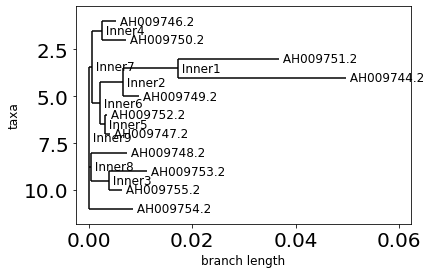

In [ ]:
rag2_tree = Phylo.read(file="data/jaguar.xml", format= "phyloxml")

# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(rag2_tree)


In [ ]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(50, 60), dpi=200) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=20)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=20)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(rag2_tree, axes=axes)
fig.savefig("img/rag2_tree.jpg")

In [ ]:
### EJEMPLO: tiburones
from Bio.Align.Applications import ClustalwCommandline
import os
# cargar data multiple y crear alineamientos
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "data/sharks.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)


KeyboardInterrupt: 

In [ ]:
# cargar alineamiento 
with open("data/sharks.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')
# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)


# Inicializar el constructor del arbol ( Tree Constructor )
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
shark_tree = constructor.build_tree(alignment)
shark_tree.rooted = True
# Guardar el arbol 
#Phylo.write(shark_tree, "data/sharks_tree.xml", "phyloxml")

In [ ]:

shark_tree = Phylo.read(file="data/sharks_tree.xml", format= "phyloxml")

In [ ]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(10, 5), dpi=200) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(shark_tree, axes=axes)
fig.savefig("img/shark_cladogram")


In [ ]:
### Ejemplo: Mutaciones y filogenia
# Read the sequences and align
aln = AlignIO.read('data/msa.phy', 'phylip')

# Print the alignment
print(aln)

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

# Print the distance Matrix
print('\nDistance Matrix\n===================')
print(dm)

# Construct the phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw the phylogenetic tree
Phylo.draw(tree)

# Print the phylogenetic tree in the terminal
print('\nPhylogenetic Tree\n===================')
Phylo.draw_ascii(tree)


## Mejora de visualización de arboles en R

![rcomplement](img/rtree.jpg)

## Visualización de linajes (strains)

In [ ]:
record = SeqIO.read("data/NC_005816.gb", "genbank")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
    ("CCCGGG", "SmaI", colors.orange),
    ("AAGCTT", "HindIII", colors.red),
    ("GGATCC", "BamHI", colors.purple)]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=10,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(20 * cm, 20 * cm),
    start=0,
    end=len(record),
    circle_core=0.5)

gd_diagram.write("plasmid_circular_nice1.png", "PNG")

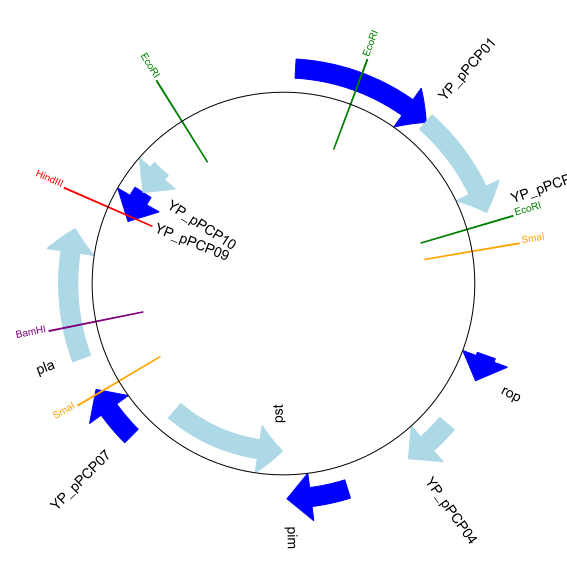

In [ ]:
Image("plasmid_circular_nice1.png")

In [ ]:
# Thale cress Chloroplast Genome
record = SeqIO.read("data/NC_000932.gb", "genbank")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=12, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
#     ("CCCGGG", "SmaI", colors.orange),
#     ("AAGCTT", "HindIII", colors.red),
#     ("GGATCC", "BamHI", colors.purple),
]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=5,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(format="linear", pagesize="A4", fragments=4, start=0, end=len(record))
# gd_diagram.write("plasmid_linear_nice.svg", "SVG")

gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(30 * cm, 30 * cm),
    start=0,
    end=len(record),
    circle_core=0.5)

gd_diagram.write("plasmid_circular_nice2.png", "PNG")

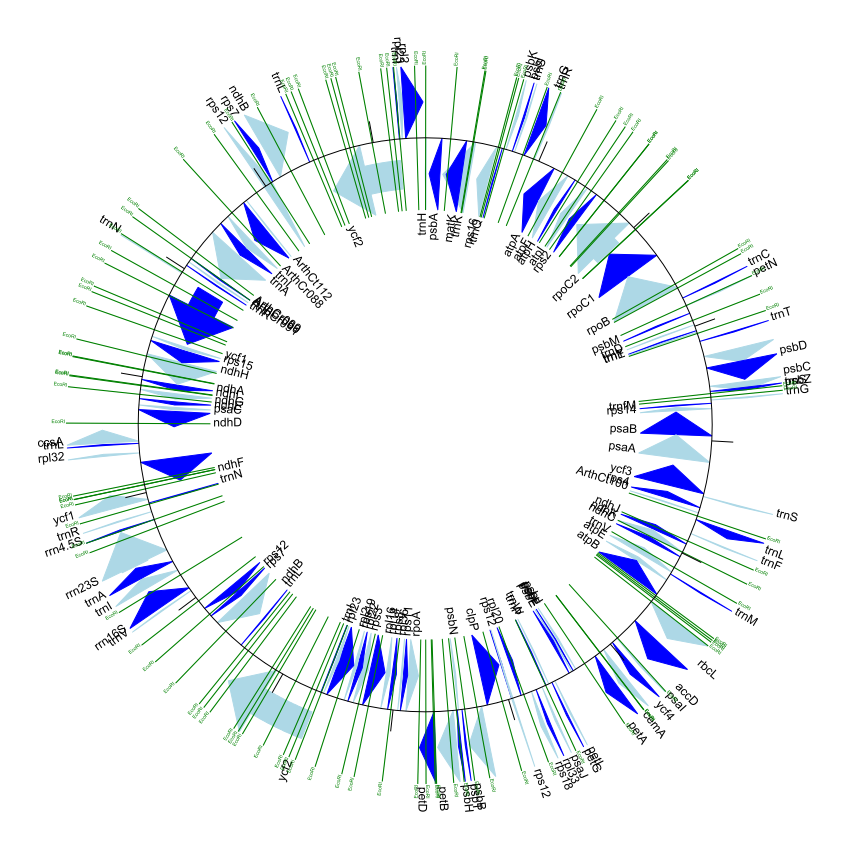

In [ ]:
Image("plasmid_circular_nice2.png")

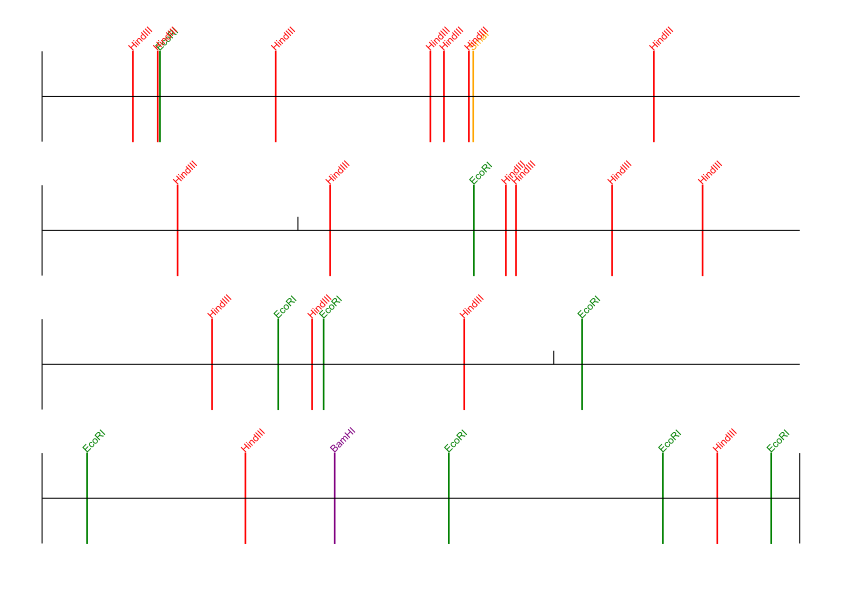

In [ ]:
# Covid-19 genome
record = SeqIO.read("Biopython/data/NC_045512.2.fna", "fasta")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
    ("CCCGGG", "SmaI", colors.orange),
    ("AAGCTT", "HindIII", colors.red),
    ("GGATCC", "BamHI", colors.purple),
]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=10,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(format="linear", pagesize="A4", fragments=4, start=0, end=len(record))
gd_diagram.write("covid_19_1.png", "PNG")

Image("covid_19_1.png")

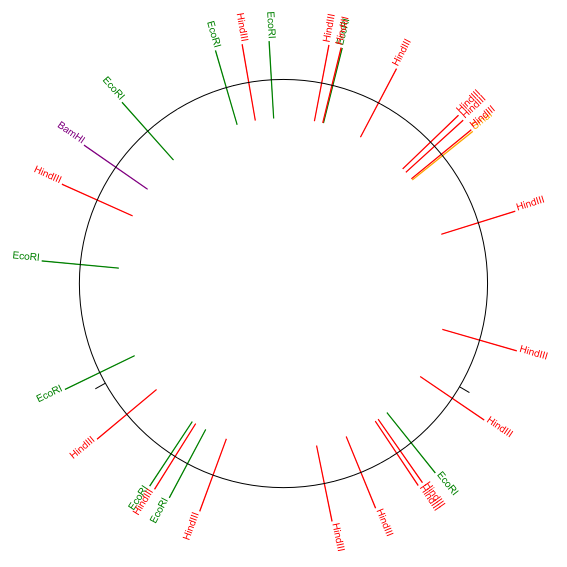

In [ ]:
gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(20 * cm, 20 * cm),
    start=0,
    end=len(record),
    circle_core=0.6)

gd_diagram.write("covid_19_2.png", "PNG")

Image("covid_19_2.png")

### Ejemplo: minado de publicaciones

In [ ]:
# cargar biopython o sus módulo, funciones
from Bio import Entrez
import re

In [ ]:
# Always tell NCBI who you are (edit the e-mail below!)
Entrez.email = "gualapuro.moises@gmail.com"
handle = Entrez.esearch(db="pubmed", 
                        term="ecuador covid[Title/Abstract]",
                        usehistory="y")
record = Entrez.read(handle)
# generate a Python list with all Pubmed IDs of articles about Dengue Network
id_list = record["IdList"]
record["Count"]

'646'

In [ ]:
print(record)

{'Count': '646', 'RetMax': '20', 'RetStart': '0', 'QueryKey': '1', 'WebEnv': 'MCID_63d84e96bc563e12b76e9037', 'IdList': ['36713085', '36711373', '36689773', '36689629', '36686389', '36683142', '36675633', '36675573', '36652158', '36651420', '36624316', '36619088', '36613032', '36612635', '36603613', '36597129', '36596046', '36576013', '36574063', '36568762'], 'TranslationSet': [{'From': 'ecuador', 'To': '"ecuador"[MeSH Terms] OR "ecuador"[All Fields] OR "ecuador\'s"[All Fields]'}], 'QueryTranslation': '("ecuador"[MeSH Terms] OR "ecuador"[All Fields] OR "ecuador s"[All Fields]) AND "covid"[Title/Abstract]'}


In [ ]:
webenv = record["WebEnv"]
query_key = record["QueryKey"]

In [ ]:
handle = Entrez.efetch(db="pubmed",
                       rettype="medline", 
                       retmode="text", 
                       retstart=0,
retmax=1000, webenv=webenv, query_key=query_key)

In [ ]:
print(handle)

<_io.TextIOWrapper encoding='UTF-8'>


In [ ]:
out_handle = open("data/covid_ec.txt", "w")
data = handle.read()
handle.close()
out_handle.write(data)
out_handle.close()

UnicodeEncodeError: 'charmap' codec can't encode character '\u202f' in position 668909: character maps to <undefined>

In [ ]:
# Contribución de los autores
with open("data/DengueNetwork_pubs.txt") as datafile:
    author_dict = {}
    for line in datafile:
        if re.match("AD", line):
            author = line.split("-", 1)[-1]# capture author
            author = author.strip()# remove leading and trailing whitespace
            author_dict[author] = 1 + author_dict.get(author, 0)# if key is present, add 1, if it's not present, initialize at 1

In [ ]:
# Top 5 en autores
for author in sorted(author_dict, key = author_dict.get, reverse = True)[:5]:
    print(author, ":", author_dict[author])

Hamer DH : 8
Wilder-Smith A : 6
Chen LH : 6
Barnett ED : 6
Freedman DO : 6


In [ ]:
# Contribución de los países


In [ ]:
for country in sorted(country_dict, key = country_dict.get, reverse = True)[:5]:
    print(country, ":", country_dict[country])

Northwest A & F University, Yangling, Shaanxi, 712100, : 46
 : 38
College of Veterinary Medicine, Sichuan : 17
Chennai, Tamil Nadu, India. : 16
Chakrabarti, Kain), Tropical Disease Unit, : 14


### Ejemplo proteomics


In [ ]:
# Usando data del Protein Data Bank (PDB)

# en anaconda prompt, ejecute 
#jupyter-nbextension enable --py --user widgetsnbextension
#jupyter-nbextension enable --py --user nglview

pdb_parser = PDBParser()
structure = pdb_parser.get_structure("PHA-L", "data/1fat.pdb")
view_pdb = nv.show_biopython(structure)
view_pdb

NameError: name 'PDBParser' is not defined

In [ ]:
# Usando data de Cristalografía (CIF)

# en anaconda prompt, ejecute 
#jupyter-nbextension enable --py --user widgetsnbextension
#jupyter-nbextension enable --py --user nglview


cif_parser = MMCIFParser()
structure = cif_parser.get_structure("6EBK", "fa/6ebk.cif")
view2 = nv.show_biopython(structure)
view2

NGLWidget()

### Proteínas, accediendo a la información de la data

¿Cuál es el diseño general de un objeto de estructura?

El objeto Estructura sigue la llamada arquitectura SMCRA (Estructura / Modelo / Cadena / Residuo / Átomo):

* Una estructura consta de modelos
* Un modelo consta de cadenas
* Una cadena consta de residuos
* Un residuo consta de átomos
* Acceder a la secuencia de residuos

La molécula anterior tiene 4 modelos principales, que se representan a continuación cuando resseq (Secuencia de residuos) se restablece para cada modelo.

In [ ]:
mmcif_dict = MMCIF2Dict.MMCIF2Dict("fa/1fat.cif")

NameError: ignored

In [ ]:
# Iterate over all residues in a model
structure = cif_parser.get_structure("1fat", "fa/1fat.cif")
for model in structure:
    count = 0
    for residue in model.get_residues():
        print(residue)
        count += 1
        if count > 20: 
            break
    print("\nResiduos impresos: ", count)

NameError: ignored

In [ ]:
residues = structure.get_residues() # objeto generador
res_list = Selection.unfold_entities(structure, "R") # iterador de residuos

In [ ]:
# Construyendo los polipéptidos CA-CA
ppb = CaPPBuilder()
counter = 1
for pp in ppb.build_peptides(structure):
    seq = pp.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq)
    counter += 1

In [ ]:
# Define parser and get structure from file
parser = MMCIFParser()
structure = parser.get_structure("PHA-L", "fa/1fat.cif")

# Define polypeptide builder
ppb = CaPPBuilder()

# Create empty list for chains
all_seqs = []
counter = 1

# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure):
    seq_info = {}
    seq = pp.get_sequence()
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str

    seq_info['Sequence Number'] = counter # set sequence id
    seq_info['Sequence'] = seq # store Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = round(analyzed_seq.molecular_weight(), 2) # mol weight
    seq_info['GRAVY'] = round(analyzed_seq.gravy(), 4) # average hydrophobicity
    seq_info['Amino Acid Count'] = analyzed_seq.count_amino_acids() # count residues
    seq_info['Amino Acid Percent'] = analyzed_seq.get_amino_acids_percent() # normalized count
    seq_info['Secondary Structure'] = analyzed_seq.secondary_structure_fraction() # helix, turn, sheet
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1

In [ ]:
all_seqs[0]['Molecular Weight']

In [ ]:
seq1 = all_seqs[1]['Sequence']
seq1

In [ ]:
analysed_seq = ProteinAnalysis(str(seq1))
analysed_seq.molecular_weight()

**Gravy**

> Protein GRAVY devuelve el valor de GRAVY (gran promedio de hidropatía) para las secuencias de proteínas que ingresa. El valor de GRAVY se calcula sumando el valor de hidropatía para cada residuo y dividiendo por la longitud de la secuencia (Kyte y Doolittle; 1982).

Un valor más alto es una mayor hidrofobicidad.

[Source](https://pubmed.ncbi.nlm.nih.gov/7108955/):
Kyte J, Doolittle RF (May 1983). "A simple method for displaying the hydropathic character of a protein". J. Mol. Biol. 157 (1): 105–32. PMID 7108955

In [ ]:
analysed_seq.gravy()

In [ ]:
analysed_seq.count_amino_acids()

In [ ]:
analysed_seq.get_amino_acids_percent()

### Estructura secundaria

Devuelve una tupla de porcentaje (hélice, giro, hoja) (`helix, turn, sheet`). Tenga en cuenta que no todos los residuos pertenecen a una estructura secundaria, de ahí que la suma (fracciones)! = 1

In [ ]:
analysed_seq.secondary_structure_fraction() # helix, turn, sheet

(0.33163265306122447, 0.3163265306122449, 0.17346938775510204)

**Protein Scales**

Puede revisar sobre las escalas de proteína [en este enlace](https://github.com/biopython/biopython/blob/master/Bio/SeqUtils/ProtParamData.py#L6).

- Kyte & Doolittle index of hydrophobicity --> kd
- Normalized flexibility parameters (B-values), average --> Flex
- Hydrophilicity --> hw
- Surface accessibility --> em
- Janin Interior to surface transfer energy scale --> ja

In [ ]:
analysed_seq.protein_scale(window=7, param_dict=ProtParamData.kd)

[-1.3857142857142857,
 -1.0,
 -0.4000000000000001,
 0.04285714285714288,
 -0.3714285714285714,
 0.5285714285714285,
 0.32857142857142857,
 0.20000000000000004,
 0.19999999999999996,
 -0.08571428571428573,
 -0.2571428571428571,
 1.0285714285714287,
 0.2714285714285714,
 0.5142857142857143,
 0.5714285714285714,
 0.1857142857142857,
 -0.5714285714285714,
 -0.4428571428571429,
 -1.1857142857142857,
 -0.742857142857143,
 -1.4857142857142855,
 -0.7571428571428571,
 1.586032892321652e-17,
 0.38571428571428573,
 0.8857142857142856,
 1.242857142857143,
 1.1999999999999997,
 1.1857142857142857,
 0.9857142857142857,
 0.6285714285714284,
 1.1428571428571428,
 0.2428571428571428,
 0.6285714285714284,
 0.2285714285714285,
 0.9428571428571428,
 0.31428571428571433,
 -0.08571428571428578,
 -0.9857142857142857,
 -0.2285714285714286,
 -0.9285714285714286,
 -0.6571428571428571,
 -0.9999999999999999,
 -1.2714285714285716,
 -0.8285714285714284,
 0.21428571428571433,
 0.21428571428571427,
 0.671428571428571

In [ ]:
ProtParamData.kd

{'A': 1.8,
 'R': -4.5,
 'N': -3.5,
 'D': -3.5,
 'C': 2.5,
 'Q': -3.5,
 'E': -3.5,
 'G': -0.4,
 'H': -3.2,
 'I': 4.5,
 'L': 3.8,
 'K': -3.9,
 'M': 1.9,
 'F': 2.8,
 'P': -1.6,
 'S': -0.8,
 'T': -0.7,
 'W': -0.9,
 'Y': -1.3,
 'V': 4.2}

In [ ]:
def analyze_protein(structure):
    all_seqs = []
    counter = 1
    
    # For each polypeptide in the structure, run protein analysis methods and store in dict
    for pp in ppb.build_peptides(structure):
        seq_info = {}
        seq = pp.get_sequence()
        analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str

        seq_info['Sequence Number'] = counter # set sequence id
        seq_info['Sequence'] = seq # store Seq() object
        seq_info['Sequence Length'] = len(seq) # length of seq
        seq_info['Molecular Weight'] = round(analyzed_seq.molecular_weight(), 2) # mol weight
        seq_info['GRAVY'] = round(analyzed_seq.gravy(), 4) # average hydrophobicity
        seq_info['Amino Acid Count'] = analyzed_seq.count_amino_acids() # count residues
        seq_info['Amino Acid Percent'] = analyzed_seq.get_amino_acids_percent() # normalized count
        seq_info['Secondary Structure'] = analyzed_seq.secondary_structure_fraction() # helix, turn, sheet

        # Update all_seqs list and increase counter
        all_seqs.append(seq_info)
        counter += 1
    return all_seqs

In [ ]:
analyzed_seqs = analyze_protein(structure)
analyzed_seqs[0:2]

[{'Sequence Number': 1,
  'Sequence': Seq('SNDIYFNFQRFNETNLILQRDASVSSSGQLRLTNLN'),
  'Sequence Length': 36,
  'Molecular Weight': 4176.52,
  'GRAVY': -0.5611,
  'Amino Acid Count': {'A': 1,
   'C': 0,
   'D': 2,
   'E': 1,
   'F': 3,
   'G': 1,
   'H': 0,
   'I': 2,
   'K': 0,
   'L': 5,
   'M': 0,
   'N': 6,
   'P': 0,
   'Q': 3,
   'R': 3,
   'S': 5,
   'T': 2,
   'V': 1,
   'W': 0,
   'Y': 1},
  'Amino Acid Percent': {'A': 0.027777777777777776,
   'C': 0.0,
   'D': 0.05555555555555555,
   'E': 0.027777777777777776,
   'F': 0.08333333333333333,
   'G': 0.027777777777777776,
   'H': 0.0,
   'I': 0.05555555555555555,
   'K': 0.0,
   'L': 0.1388888888888889,
   'M': 0.0,
   'N': 0.16666666666666666,
   'P': 0.0,
   'Q': 0.08333333333333333,
   'R': 0.08333333333333333,
   'S': 0.1388888888888889,
   'T': 0.05555555555555555,
   'V': 0.027777777777777776,
   'W': 0.0,
   'Y': 0.027777777777777776},
  'Secondary Structure': (0.3333333333333333,
   0.3333333333333333,
   0.1944444444444444

In [ ]:
cif_parser = MMCIFParser()
structure = cif_parser.get_structure("1fat", "fa/1fat.cif")
view3 = nv.show_biopython(structure)
view3

NGLWidget()